# titanic 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
#na값 쉽게 보는 함수
import missingno as msno 
# Warnings 메세지제거
import warnings
warnings.filterwarnings('ignore')

### 1. data input

In [3]:
#df_train = pd.read_csv('/gdrive/My Drive/kaggle/titanic/train.csv')
#df_test = pd.read_csv('/gdrive/My Drive/kaggle/titanic/test.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print(df_train.shape,df_test.shape)

(891, 12) (418, 11)


In [5]:
df_train.head()
# 종속변수 : survived
# 설명변수 : pclass(category, ordinal), name(char), sex(category), age, sibsp, parch, ticket(char/num), fare, cabin(char), embarked(category) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. data preprocessing
#### 2.1. data merge

In [8]:
df_test['Survived']=999   #df_test의 target 변수에 '999' 넣기
df=pd.concat([df_train, df_test],axis=0,ignore_index=True)

#### 2.2. data NA값 살펴보기

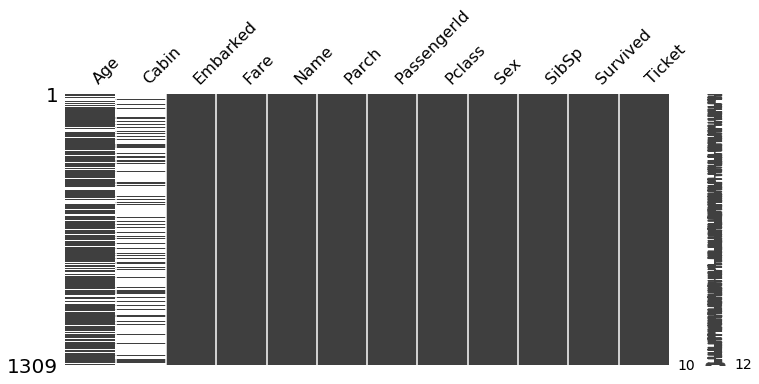

In [9]:
msno.matrix(df, figsize=(12,5))
#AGE, CABIN

In [10]:
for col in df.columns:
    na = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(na)
# age와 embarked 채워넣기, cabin 변수 제거

column:        Age	 Percent of NaN value: 20.09%
column:      Cabin	 Percent of NaN value: 77.46%
column:   Embarked	 Percent of NaN value: 0.15%
column:       Fare	 Percent of NaN value: 0.08%
column:       Name	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:      SibSp	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%


#### 2.3. EDA
##### 2.3.1. TAEGET 변수(survived) 확인

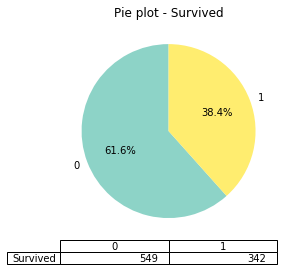

In [11]:
pie=df_train['Survived'].value_counts().plot.pie(autopct='%.1f%%',cmap='Set3', startangle=90,table=True)
pie.set_title('Pie plot - Survived')
pie.set_label
pie.set_ylabel('')
plt.show()
# 죽은 사람의 비율이 더 높음

##### 2.3.2. Pclass(ordinal, categorical variable)

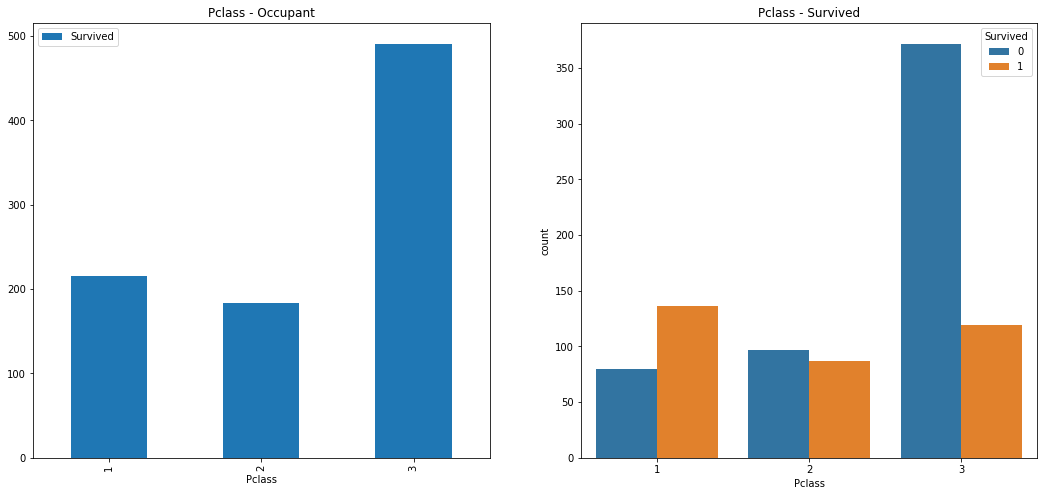

In [12]:
## 탑승자 분포
f, ax = plt.subplots(1,2,figsize=(18,8))
bar1=df_train[['Pclass','Survived']].groupby(['Pclass']).count().plot.bar(ax=ax[0])
bar1.set_title('Pclass - Occupant')
# pclass별 생존자
bar2=sns.countplot(hue='Survived',x='Pclass',data=df_train)
bar2.set_title('Pclass - Survived')
plt.show()

In [13]:
## 생존자 분포
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


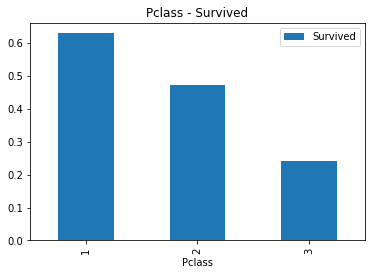

In [14]:
# class별 생존률
bar3=df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
bar3.set_title('Pclass - Survived')
plt.show()

In [15]:
# class 좋을수록 생존률 높음

#### 2.3.3. sex( categorical variable )

In [16]:
#성별 탑승자
df_train[['Sex','Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


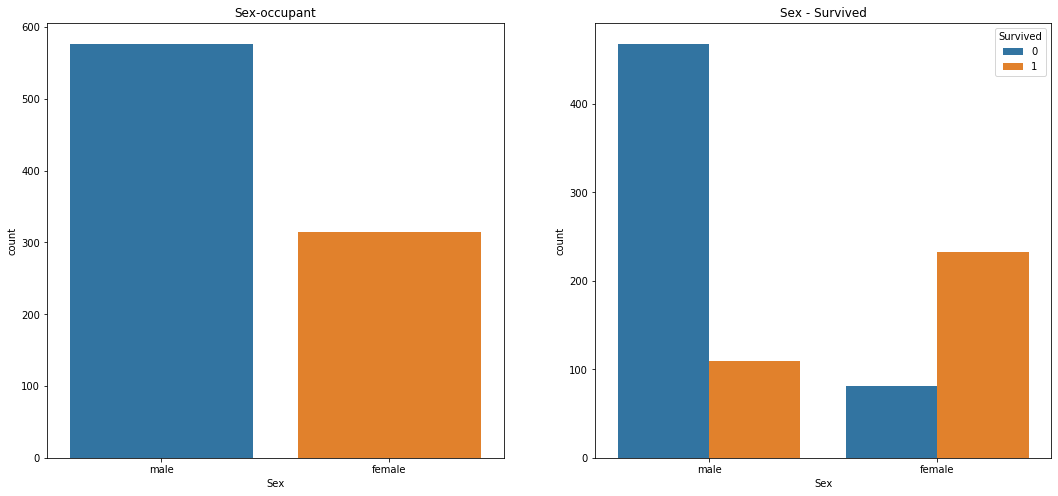

In [17]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# 성별 탑승자
bar1=sns.countplot(x='Sex', data=df_train, ax=ax[0])
bar1.set_title('Sex-occupant')
# 성별 생존자
bar2=sns.countplot(hue='Survived',x='Sex',data=df_train)
bar2.set_title('Sex - Survived')
plt.show()

In [18]:
#성별 생존자
df_train[['Sex','Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


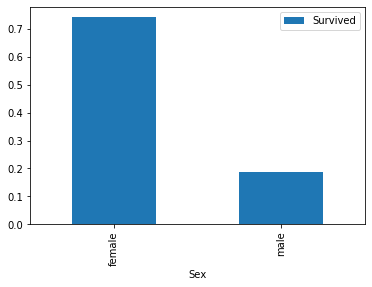

In [19]:
# 성별 생존률
#성별 탑승자
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

In [20]:
#여자 생존률이 높음

#### 2.3.4. Name(char)

In [21]:
df['title']=""
for i in range(len(df['Name'])):
    df['title'][i]=df['Name'][i].split(',')[1].split('.')[0].lower()

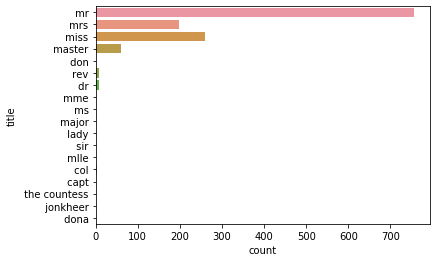

In [22]:
sns.countplot(y='title',data=df)
plt.show()

#### 2.3.5. AGE

In [23]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

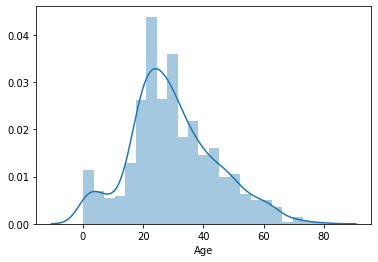

In [24]:
sns.distplot(df[df['Age']>0]['Age'])
plt.show()
#20~40부근이 가장 많다.

#### 2.3.6.sibsp

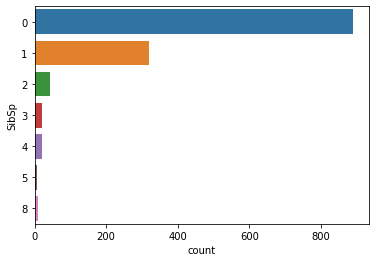

In [25]:
sns.countplot(y='SibSp', data=df)
plt.show()
#형제가 없는 경우가 가장 많다.

#### 2.3.7.Parch

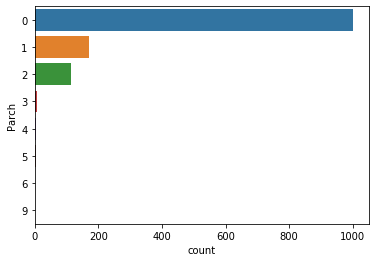

In [26]:
sns.countplot(y='Parch', data=df)
plt.show()
#혼자인 경우가 가장 많다.

#### 2.3.8.ticket(char/num)

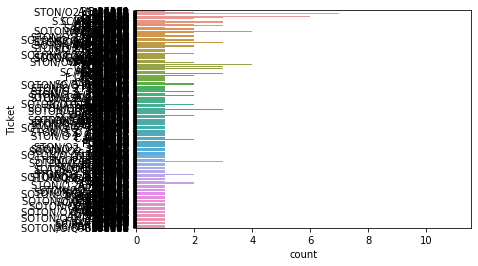

In [27]:
sns.countplot(y='Ticket',data=df)

In [28]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
347077           7
S.O.C. 14879     7
                ..
14311            1
2687             1
110564           1
349206           1
113044           1
Name: Ticket, Length: 929, dtype: int64

In [29]:
df['Ticket_type']=""
for i in range(len(df['Ticket'])):
    if df['Ticket'][i] in (df['Ticket'].value_counts()[df['Ticket'].value_counts()==1]).index:
        df['Ticket_type'][i]="Single"
    elif df['Ticket'][i] in (df['Ticket'].value_counts()[df['Ticket'].value_counts()==2]).index:
        df['Ticket_type'][i]="Double"
    else:
        df['Ticket_type'][i]="Multiple"
df['Ticket_type']

0         Single
1         Double
2         Single
3         Double
4         Single
          ...   
1304      Single
1305    Multiple
1306      Single
1307      Single
1308    Multiple
Name: Ticket_type, Length: 1309, dtype: object

In [30]:
df['Ticket_type'].value_counts()

Single      713
Multiple    332
Double      264
Name: Ticket_type, dtype: int64

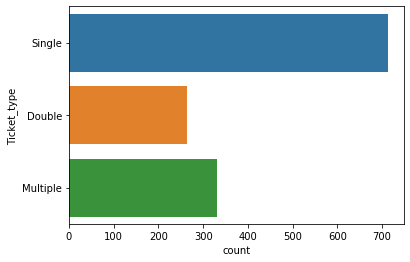

In [31]:
sns.countplot(y='Ticket_type',data=df)
plt.show()

#### 2.3.9.fare

In [32]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

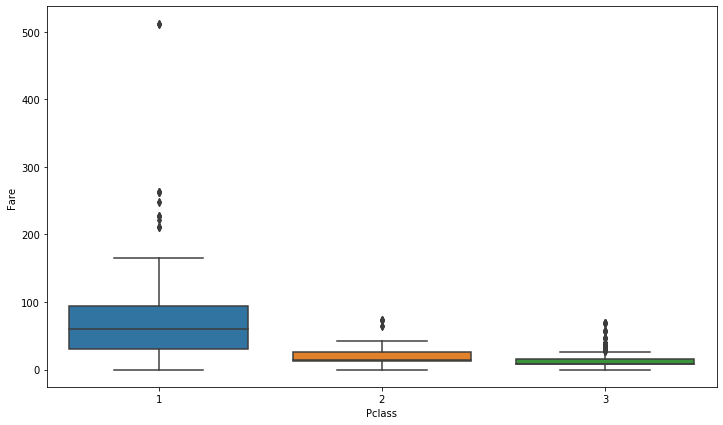

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=df_train)
#class1이 가장 비싼티켓

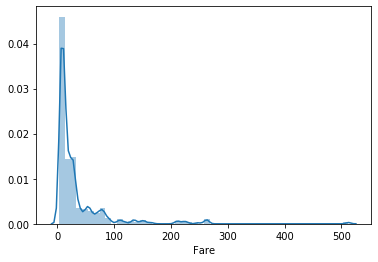

In [34]:
sns.distplot(df[df['Fare']>0]['Fare'])
plt.show()

#### 2.3.10.cabin(char)

In [35]:
df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [36]:
#제거하기

#### 2.4. NA값 처리하기

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
title          1309 non-null object
Ticket_type    1309 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 143.3+ KB


##### 2.4.1. Embarked 변수 채워넣기

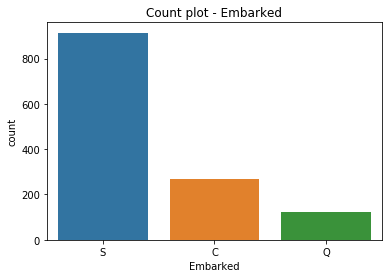

In [38]:
bar=sns.countplot('Embarked', data = df)
bar.set_title('Count plot - Embarked')
plt.show()
#S가 가장 많음! S로 채워넣기

In [39]:
#NaN values are replaced with 'S'
df['Embarked'].replace({np.nan:'S'} , inplace = True)

#### 2.4.2 더미변수 처리하기

In [40]:

#종속변수 : survived
# 설명변수 : pclass(category, ordinal), name(char), sex(category), age, sibsp, parch, ticket(char/num), fare, cabin(char), embarked(category) 
df=pd.get_dummies(df,columns=['Pclass','Sex','title','Embarked','Ticket_type'])

##### 2.4.3 NA값 채워넣기

In [41]:
# 문자 변수 제거(NAME은 추후에 어떻게 사용할지 생각해보기)
df.drop(columns = ['Cabin'] , inplace = True)
df.drop(columns=['Name'] , inplace = True)
df.drop(columns=['Ticket'] , inplace = True)

In [42]:
from fancyimpute import IterativeImputer


Using TensorFlow backend.


In [43]:
# MICE 방법
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_mice = df.copy()
df_mice.iloc[:,:] = MICE_imputer.fit_transform(df_mice)  # 결과값을 데이터 프레임에 넣어주기

In [44]:
#Imputing using KNN : 
from fancyimpute import KNN
knn_imputer = KNN()
df_knn = df.copy()
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

Imputing row 1/1309 with 0 missing, elapsed time: 0.774
Imputing row 101/1309 with 0 missing, elapsed time: 0.777
Imputing row 201/1309 with 0 missing, elapsed time: 0.779
Imputing row 301/1309 with 1 missing, elapsed time: 0.780
Imputing row 401/1309 with 0 missing, elapsed time: 0.782
Imputing row 501/1309 with 0 missing, elapsed time: 0.785
Imputing row 601/1309 with 0 missing, elapsed time: 0.787
Imputing row 701/1309 with 0 missing, elapsed time: 0.790
Imputing row 801/1309 with 0 missing, elapsed time: 0.792
Imputing row 901/1309 with 0 missing, elapsed time: 0.794
Imputing row 1001/1309 with 0 missing, elapsed time: 0.796
Imputing row 1101/1309 with 0 missing, elapsed time: 0.798
Imputing row 1201/1309 with 0 missing, elapsed time: 0.801
Imputing row 1301/1309 with 0 missing, elapsed time: 0.803


In [45]:
#NA값이 모두 채워넣어짐
df_knn.info()
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 35 columns):
Age                     1309 non-null float64
Fare                    1309 non-null float64
Parch                   1309 non-null float64
PassengerId             1309 non-null float64
SibSp                   1309 non-null float64
Survived                1309 non-null float64
Pclass_1                1309 non-null float64
Pclass_2                1309 non-null float64
Pclass_3                1309 non-null float64
Sex_female              1309 non-null float64
Sex_male                1309 non-null float64
title_ capt             1309 non-null float64
title_ col              1309 non-null float64
title_ don              1309 non-null float64
title_ dona             1309 non-null float64
title_ dr               1309 non-null float64
title_ jonkheer         1309 non-null float64
title_ lady             1309 non-null float64
title_ major            1309 non-null float64
title_ master      

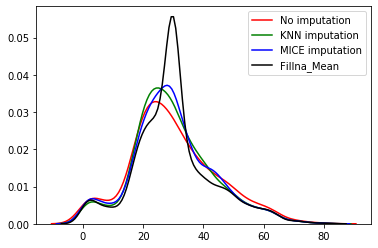

In [46]:
# 결측치 처리 결과 그림으로 확인하기
sns.kdeplot(df['Age'] , c = 'r' , label = 'No imputation')
sns.kdeplot(df_knn['Age'] , c = 'g' , label = 'KNN imputation')
sns.kdeplot(df_mice['Age'] , c = 'b' , label = 'MICE imputation')
sns.kdeplot(df['Age'].fillna(df['Age'].mean()) , c = 'k' , label = 'Fillna_Mean')
plt.show()

#### 2.5. data 다시 split

In [47]:
#Spiltting Test and Train Datas:
dfm_train = df_mice[df_mice['Survived'] != 999]
dfm_test  = df_mice[df_mice['Survived'] == 999]

In [48]:
#test set의 target변수 제거
dfm_test.drop(columns = 'Survived', inplace = True)

### 3. modeling 

#### 3.1. xgboost

In [49]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
#train 변수 나누기
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=20, seed=123)
xg_cl.fit(X_train, y_train)
#예측하기
preds = xg_cl.predict(X_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.820896


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , preds)

array([[143,  27],
       [ 21,  77]], dtype=int64)

In [101]:
y_pred =  xg_cl.predict(dfm_test.drop(columns='PassengerId')).astype('int')
results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_pred})
print(results)
results.to_csv('Prediction_XGB.csv', index=False)

      PassengerId  Survived
891           892         0
892           893         1
893           894         0
894           895         0
895           896         1
...           ...       ...
1304         1305         0
1305         1306         1
1306         1307         0
1307         1308         0
1308         1309         1

[418 rows x 2 columns]


### tuning 있는 xgboost

In [109]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
X, y = dfm_train.drop(columns = ['Survived','PassengerId']) , dfm_train['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 3,5,7 , 10],
        'gamma': [0.5, 1, 1.5, 2,3,4, 5],
        'subsample': [0.6,0.7, 0.8,0.9, 1.0],
        'colsample_bytree': [0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [3, 4, 5 , 6]
        }

xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    4.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002BC0ECECDC8>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           obje...
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytre

In [110]:
random_search.best_params_

{'subsample': 0.9,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [111]:
#예측하기
preds = random_search.predict(X_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.877095


In [112]:
y_test = random_search.predict(dfm_test.drop(columns='PassengerId')).astype('int')
results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
print(results)
results.to_csv('Prediction_XGB_hp.csv', index=False)

      PassengerId  Survived
891           892         0
892           893         0
893           894         0
894           895         0
895           896         1
...           ...       ...
1304         1305         0
1305         1306         1
1306         1307         0
1307         1308         0
1308         1309         1

[418 rows x 2 columns]


#### 3.2. random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
param={'n_estimators':[100,200,300],
       'max_depth':[6,8,10,12],
       'min_samples_leaf':[3,5,7,10,15],
       'min_samples_split':[2,3,5,10]
    
}
rf = RandomForestClassifier(n_estimators=100,
                              n_jobs=-1,
                              random_state=0,warm_start=True)
random_search = RandomizedSearchCV(rf, param_distributions=param, scoring='accuracy', cv=skf.split(X_train,y_train))
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002BC0ECEC848>,
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_frac...
                                                    n_estimators=100, n_

In [114]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 12}

In [115]:
#예측하기
preds = random_search.predict(X_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.000000


In [116]:
y_test = random_search.predict(dfm_test.drop(columns='PassengerId')).astype('int')
results = pd.DataFrame(data={'PassengerId':dfm_test['PassengerId'].astype('int'), 'Survived':y_test})
print(results)
results.to_csv('Prediction_rf_hp.csv', index=False)

      PassengerId  Survived
891           892         0
892           893         0
893           894         0
894           895         0
895           896         1
...           ...       ...
1304         1305         0
1305         1306         1
1306         1307         0
1307         1308         0
1308         1309         1

[418 rows x 2 columns]
